# Get Dataset

In [3]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2024-04-09 10:28:01--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   156KB/s    in 0.5s    

2024-04-09 10:28:02 (156 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



# Import thư viện

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# DATA PREPARATION

In [5]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [8]:
data = df[['FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']]\
        .rename(columns={'FUELCONSUMPTION_HWY': 'HWY',
                 'FUELCONSUMPTION_COMB_MPG': 'COMB_MPG'})
data.head()

,HWY,COMB_MPG,CO2EMISSIONS
0,6.7,33,196
1,7.7,29,221
2,5.8,48,136
3,9.1,25,255
4,8.7,27,244


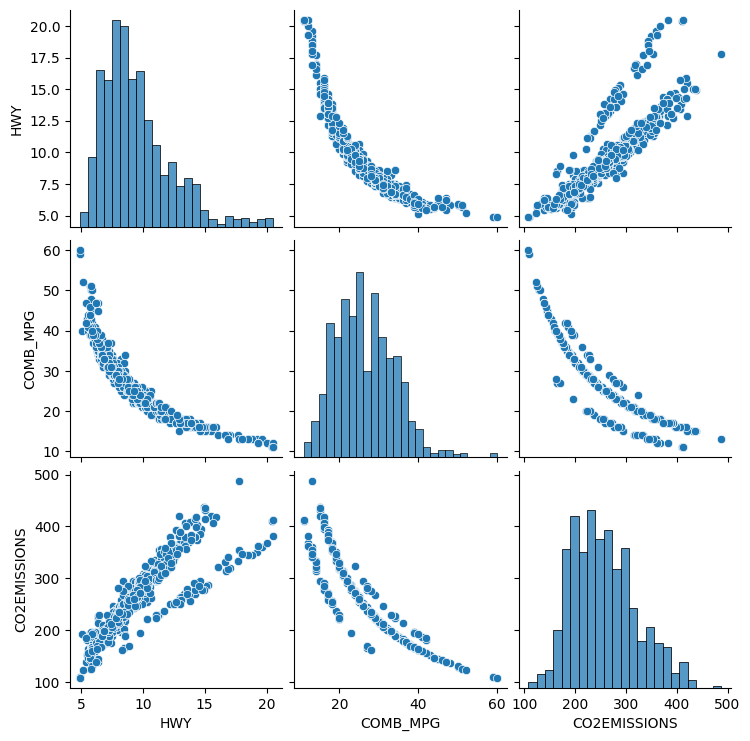

In [9]:
sns.pairplot(data);

In [10]:
data["COMB_MPG^2"] = data["COMB_MPG"] ** 2

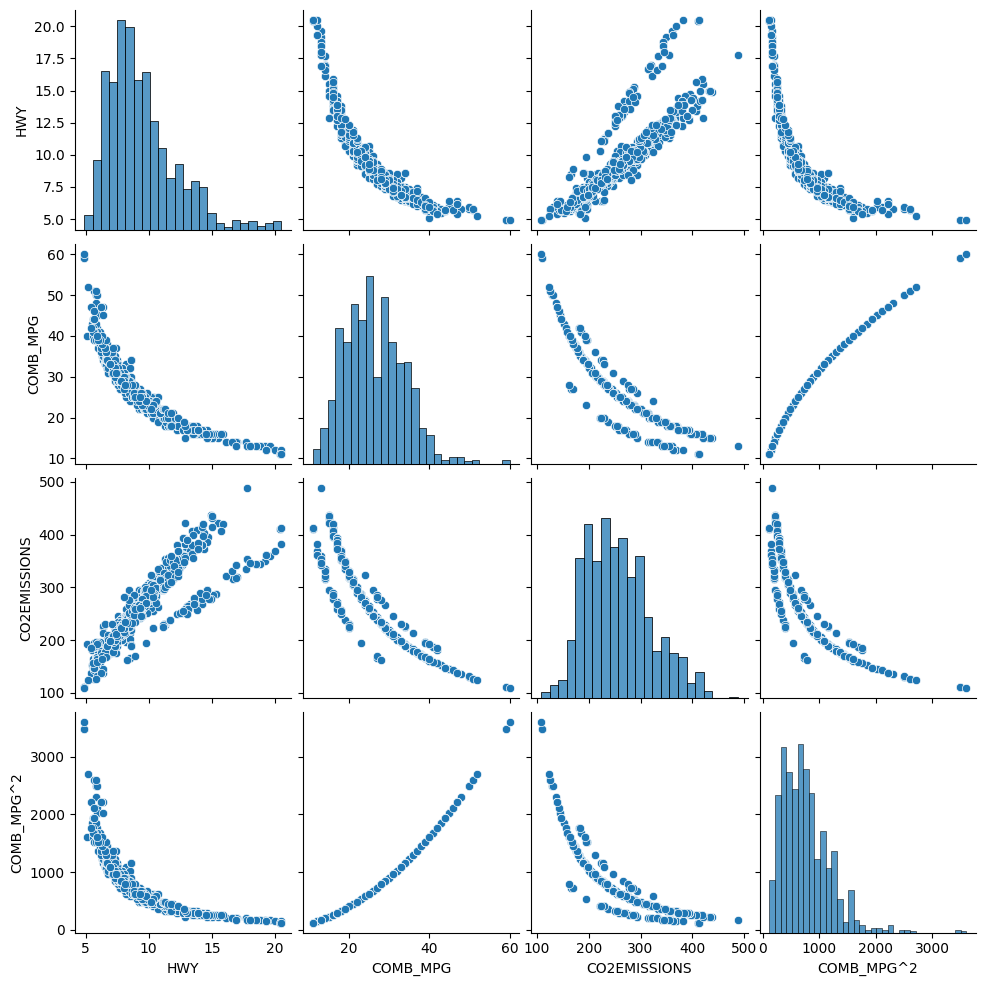

In [11]:
sns.pairplot(data);

In [12]:
data["HWY_LOG"] = data["HWY"].apply(np.log1p)

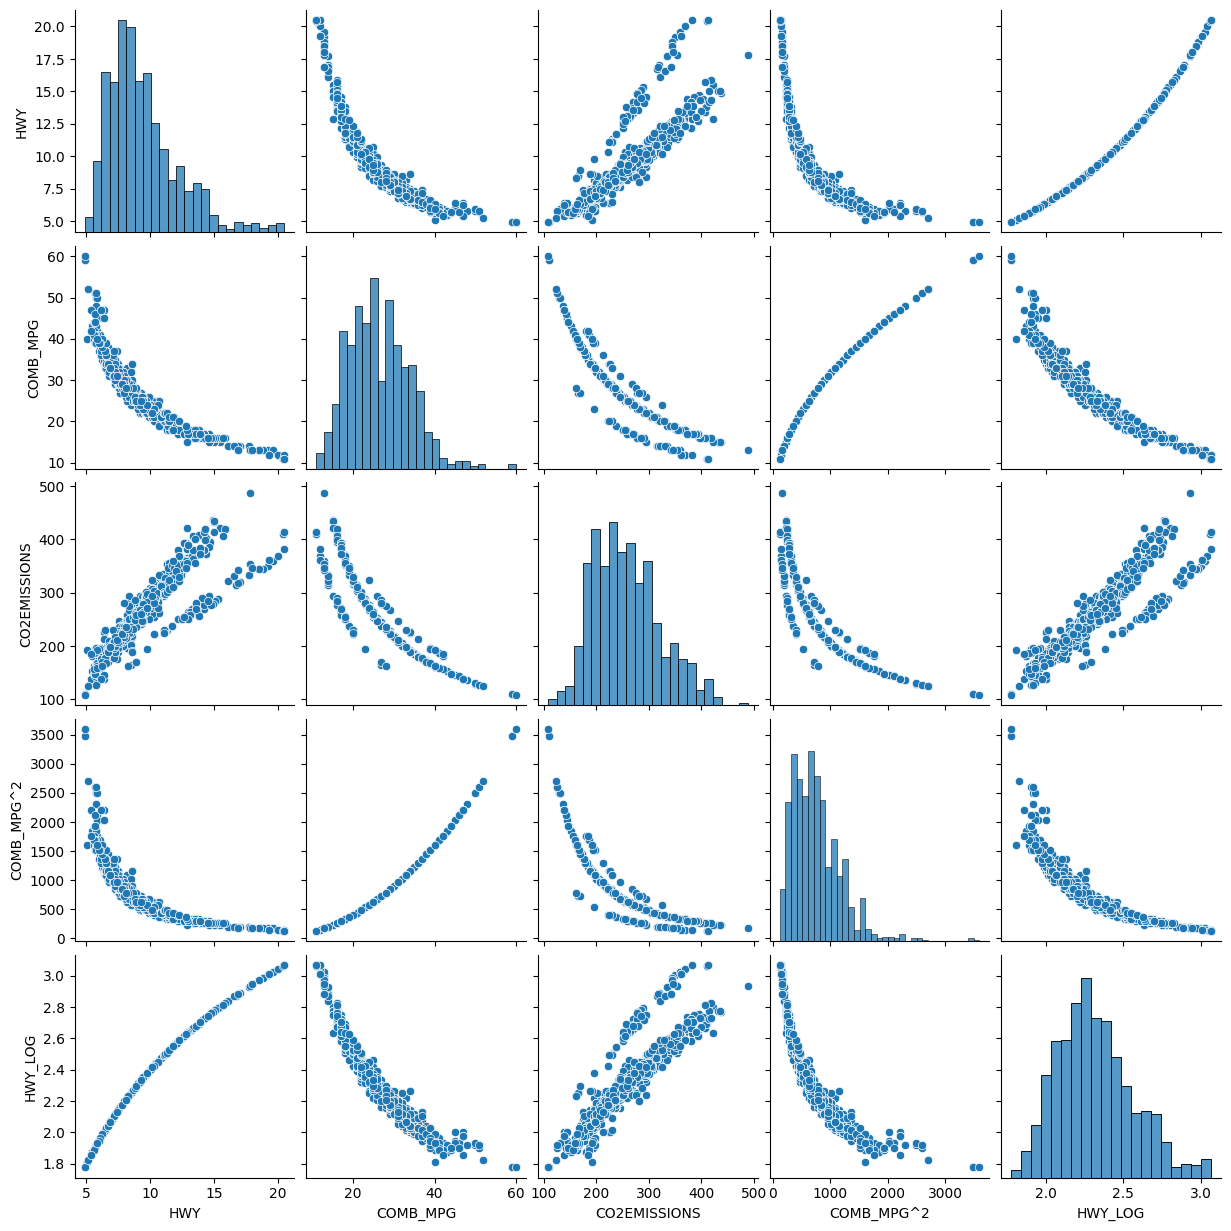

In [13]:
sns.pairplot(data);

In [19]:
X = np.asanyarray(data.drop("CO2EMISSIONS", axis = 1))
Y = np.asanyarray(data[['CO2EMISSIONS']])

In [21]:
print(len(X), len(Y))

1067 1067


In [22]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, train_size = 0.8, random_state=1)

In [23]:
print(len(train_x), len(test_x))

853 214


# XÂY DỰNG THUẬT TOÁN

In [ ]:
def predict():
  ...

In [ ]:
def compute_cost():
  ...

In [ ]:
def compute_gradient():
  ...

In [ ]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
  '''
  Performs gradient descent to fit w,b. Updates w,b by taking
  num_iters gradient steps with learning rate alpha

  Args:
    x (ndarray (m,))  : Data, m examples
    y (ndarray (m,))  : target values
    w_in,b_in (scalar): initial values of model parameters
    alpha (float):     Learning rate
    num_iters (int):   number of iterations to run gradient descent
    cost_function:     function to call to produce cost
    gradient_function: function to call to produce gradient

  Returns:
    w (scalar): Updated value of parameter after running gradient descent
    b (scalar): Updated value of parameter after running gradient descent
    J_history (List): History of cost values
    p_history (list): History of parameters [w,b]
  '''
  ...

In [ ]:
# initialize parameters
w_init = ...
b_init = ...
# some gradient descent settings
iterations = ...
alpha = ...
# run gradient descent
w, b, J_hist, p_hist = gradient_descent(...)
print(f"(w,b) found by gradient descent: ({w:8.4f},{b:8.4f})")

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)

print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

In [ ]:
test_y_sk = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_sk - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_sk - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_sk))

test_y_ = predict(test_x, w, b)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_))
print("Cost: %.2f" % compute_cost(test_y , test_y_))

# VISUALIZATION

## TÌM HIỂU CÁCH VẼ ĐƯỜNG ĐỒNG MỨC VÀ VISUALIZE ĐƯỜNG ĐI GIÁ TRỊ CỦA HÀM LOSS VÀ HÀM COST

In [ ]:
def visulize():
  ...

In [ ]:
...